# Projecting images to latent space with StyleGAN2.

Reference: https://github.com/woctezuma/stylegan2-projecting-images

## Requirements

### Install ImageMagick

In [1]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

### Install StyleGAN2

In [2]:
!rm -rf stylegan2/
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.


In [3]:
%cd stylegan2/

/content/stylegan2


In [4]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


## Data

### Download a target image

In [5]:
!curl -O https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/emmanuel-macron.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77364  100 77364    0     0   180k      0 --:--:-- --:--:-- --:--:--  180k


### Pre-process the target image: center-crop to 1024x1024

In [0]:
# References:
# [1] https://gist.github.com/dylanvee/3419976
# [2] http://www.imagemagick.org/Usage/thumbnails/#cut
!convert -gravity center -resize 1024x1024^ -extent 1024x1024 emmanuel-macron.jpg emmanuel-macron-crop.jpg

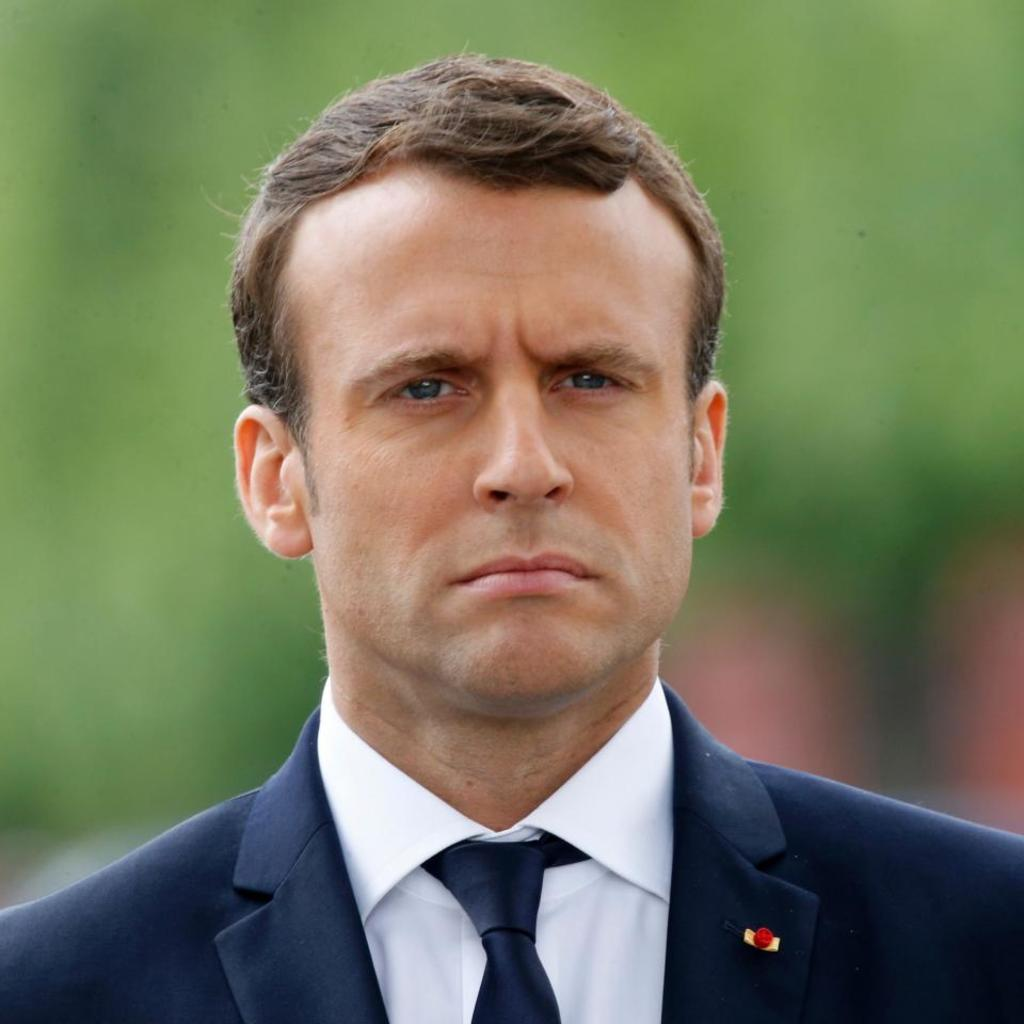

In [7]:
from IPython.display import Image, display

preprocessed_target_image_name = 'emmanuel-macron-crop.jpg'

preprocessed_target_image = Image(preprocessed_target_image_name)

display(preprocessed_target_image)

### Move the preprocessed target image into the folder expected by StyleGAN2

In [0]:
!mkdir -p /content/img/
!mv emmanuel-macron-crop.jpg /content/img/

## StyleGAN2 workflow

### Preparing datasets

In [9]:
!python dataset_tool.py create_from_images '/content/datasets/real' '/content/img'

Loading images from "/content/img"
Creating dataset "/content/datasets/real"
Added 1 images.


### Projecting images to latent space

#### Help

In [11]:
!python run_projector.py project-real-images --help

usage: run_projector.py project-real-images [-h] --network NETWORK_PKL
                                            --data-dir DATA_DIR --dataset
                                            DATASET_NAME
                                            [--num-snapshots NUM_SNAPSHOTS]
                                            [--num-images NUM_IMAGES]
                                            [--result-dir DIR]

optional arguments:
  -h, --help            show this help message and exit
  --network NETWORK_PKL
                        Network pickle filename
  --data-dir DATA_DIR   Dataset root directory
  --dataset DATASET_NAME
                        Training dataset
  --num-snapshots NUM_SNAPSHOTS
                        Number of snapshots (default: 5)
  --num-images NUM_IMAGES
                        Number of images to project (default: 3)
  --result-dir DIR      Root directory for run results (default: results)


#### Run

In [12]:
!python run_projector.py project-real-images --network=gdrive:networks/stylegan2-ffhq-config-f.pkl --dataset=real --data-dir='/content/datasets' --num-images=1

Local submit - run_dir: results/00000-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Loading images from "real"...
tcmalloc: large alloc 4294967296 bytes == 0x65e84000 @  0x7f6c081ab001 0x7f6c05cc90f5 0x7f6c05d2c4d9 0x7f6c05d2e6af 0x7f6c05dc49b8 0x50ac25 0x50d390 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5a067e 0x50d966 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x58958c 0x5a067e 0x50d966 0x509d48 0x50aa7d 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x58958c 0x5a067e
tcmalloc: large alloc 4294967296 bytes == 0x7f69c1a40000 @  0x7f6c081a91e7 0x7f6c05cc8f71 0x7f6c05d2c55d 0x7f6c05d2cbe7 0x7f6c05dc4898 0x50ac25 0x50d390 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x50a080 0x50aa7d 0x

### Displaying the projected images

#### Parameters

In [0]:
projection_folder_name = '/content/stylegan2/results/00000-project-real-images/'

In [0]:
# There is only one image, so the id is the first index (zero).
image_id_as_int = 0

In [0]:
image_id = '{:04d}'.format(image_id_as_int)
ext = '.png'

#### Display

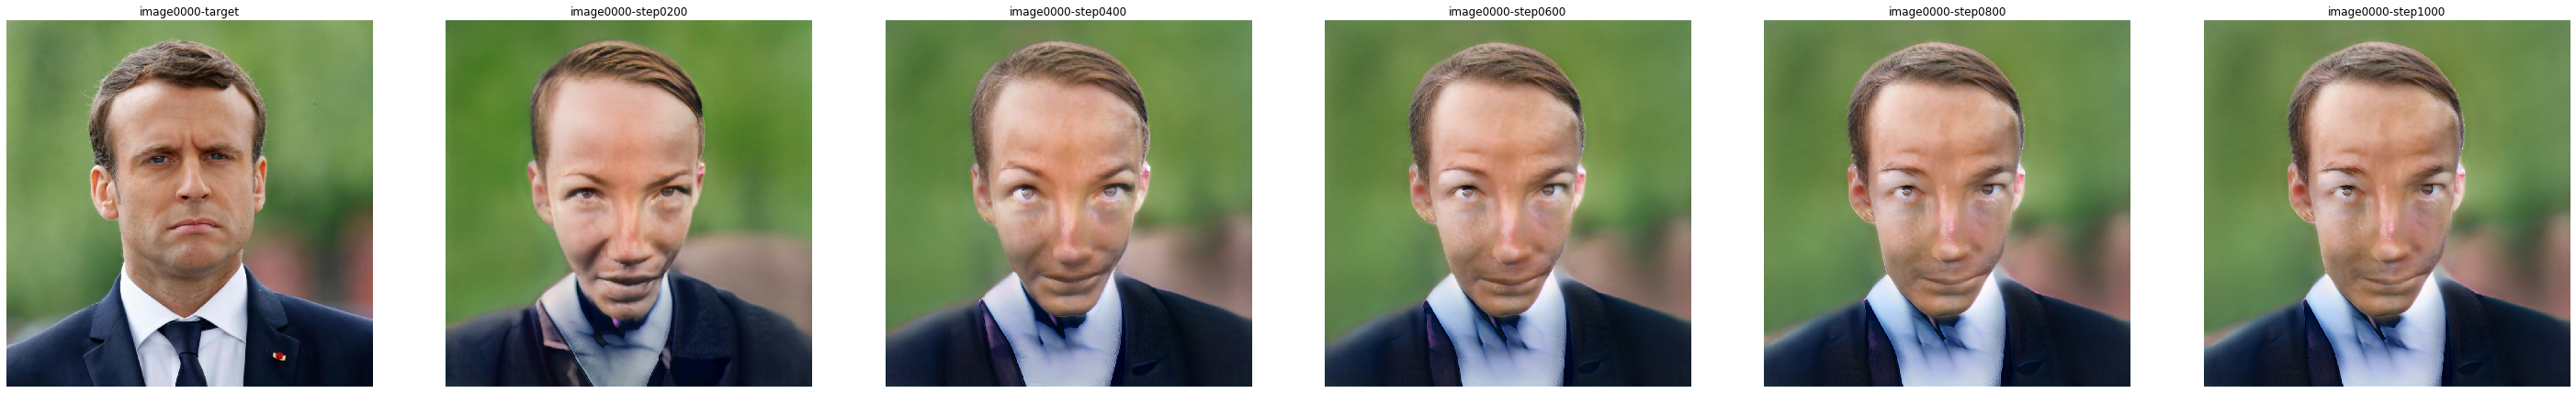

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#%matplotlib inline

# The first picture is the target, then there are the 4 projections as the number of steps increases.
num_cols = 6

# Caveat: if nrows is different from 1, then axs is a list of list of axes, instead of a list of axes. So, you will get errors such as:
# https://stackoverflow.com/questions/43957776/numpy-ndarray-object-has-no-attribute-imshow
fig, axs = plt.subplots(nrows=1,
                        ncols=num_cols,
                        figsize=(50,50))

for i, ax in enumerate(axs):
  if i == 0:
    # Target (input)
    f_name = 'image' + image_id + '-target'
  else:
    # Projections
    f_name = 'image' + image_id + '-step{:04d}'.format(200*i)

  image_name = projection_folder_name + f_name + ext
  img = mpimg.imread(image_name)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f_name)

plt.show()